# Random forest for net delay estimation use CircuitOps Manager

> xlindo, 2024.11

## Prepare the CircuitOps object and extract the information for machine learning

In [1]:
import os
import sys

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, f"{parent_dir}/src")

In [2]:
import circuitops_helper as coh
from circuitops_manager import CircuitOpsManager

In [3]:
TABLES_DIR = "IRs/asap7/ibex/"  # or use yours

In [4]:
# read tables
(
    pin_df,
    cell_df,
    net_df,
    pin_pin_df,
    cell_pin_df,
    net_pin_df,
    net_cell_df,
    cell_cell_df,
    fo4_df,
) = coh.read_tables_OpenROAD(TABLES_DIR)

In [5]:
# check parsed data
print("fo4_df shape: ", fo4_df.shape)
print("pin_df.shape: ", pin_df.shape)
print("cell_df.shape: ", cell_df.shape)
print("net_df.shape: ", net_df.shape)
print("pin_edge_df.shape: ", pin_pin_df.shape)
print("cell_edge_df.shape: ", cell_pin_df.shape)
print("net_edge_df.shape: ", net_pin_df.shape)
print("net_cell_edge_df.shape: ", net_cell_df.shape)
print("cell_cell_edge_df.shape: ", cell_cell_df.shape)

fo4_df shape:  (216, 7)
pin_df.shape:  (72188, 18)
cell_df.shape:  (48237, 14)
net_df.shape:  (21747, 8)
pin_edge_df.shape:  (95414, 6)
cell_edge_df.shape:  (72188, 4)
net_edge_df.shape:  (72188, 4)
net_cell_edge_df.shape:  (72188, 4)
cell_cell_edge_df.shape:  (50449, 4)


In [6]:
# update vertices
pin_df, cell_df, net_df, fo4_df = coh.update_vertices(pin_df, cell_df, net_df, fo4_df)

In [7]:
### generate edges
pin_pin_df, cell_pin_df, net_pin_df, net_cell_df, cell_cell_df, edge_df = (
    coh.generate_edge_df_OpenROAD(
        pin_df,
        cell_df,
        net_df,
        pin_pin_df,
        cell_pin_df,
        net_pin_df,
        net_cell_df,
        cell_cell_df,
    )
)

pin_pin shape: (95414, 8)
cell_pin shape: (72188, 6)
net_pin shape: (72188, 6)
net_cell shape: (72188, 6)
cell_cell shape: (50449, 6)


In [8]:
# update edges
pin_pin_df, cell_pin_df, net_pin_df, net_cell_df, cell_cell_df, edge_df = (
    coh.update_edges(
        pin_pin_df, cell_pin_df, net_pin_df, net_cell_df, cell_cell_df, edge_df
    )
)

In [9]:
# create CircuitOps Manager object
com = CircuitOpsManager(pin_df, cell_df, net_df, edge_df)

print(f"num of nodes {com._co.num_vertices()}, num of edges: {com._co.num_edges()}")

num of nodes 142172, num of edges: 362427


In [10]:
### generate buffer tree
com.generate_buffer_tree()

Get Sub-GraphView: vertices:72188, edges:95414
DAG: True
Valid pins: 68854
Get Sub-GraphView: vertices:68854, edges:93744
DAG: True
buf tree start cnt:  2223 buf tree end cnt:  25598
num of buffer tree out pins:  2502
num of buffer tree out pins:  2502
num of buffer tree out pins:  561
num of buffer tree out pins:  561
num of buffer tree out pins:  239
num of buffer tree out pins:  239
num of buffer tree out pins:  99
num of buffer tree out pins:  99
num of buffer tree out pins:  101
num of buffer tree out pins:  101
num of buffer tree out pins:  67
num of buffer tree out pins:  67
num of buffer tree out pins:  52
num of buffer tree out pins:  52
num of buffer tree out pins:  28
num of buffer tree out pins:  28
num of buffer tree out pins:  0
Buffer tree ends: 22488


In [11]:
# get selected pins info
selected_pin_df = com.get_selected_pins()
driver_pin_info, sink_pin_info = com.get_driver_sink_info(pin_pin_df, selected_pin_df)

In [12]:
sink_pin_info

,id,x,y,cap,net_id,cell_id,sink_risearr,sink_fallarr,driver_pin_id,driver_x,...,cap_sum,sink_arr,driver_arr,arc_delay_mean,arc_delay_min,arc_delay_max,net_delay_mean,net_delay_min,net_delay_max,stage_delay
0,39,157.0,2718.0,6.344630e-16,134240,99452,3.445568e-10,3.489039e-10,36,27356.0,...,6.344630e-16,3.445568e-10,3.444579e-10,2.352119e-11,2.041205e-11,2.663032e-11,9.964756e-14,9.964756e-14,9.964756e-14,2.672997e-11
1,49,-419.0,32.0,1.335190e-15,134241,99456,3.583374e-10,3.667823e-10,40,27598.0,...,1.335190e-15,3.583374e-10,3.583140e-10,2.024011e-11,1.785507e-11,2.380363e-11,2.336280e-14,2.336280e-14,2.336280e-14,2.382699e-11
2,76,965.0,774.0,4.370170e-16,134252,99467,3.530660e-10,3.447172e-10,67,15100.0,...,4.370170e-16,3.447172e-10,3.446811e-10,1.534138e-11,1.517546e-11,1.550729e-11,3.648549e-14,3.648549e-14,3.648549e-14,1.554378e-11
3,88,263.0,0.0,4.370170e-16,134259,99471,3.495332e-10,3.414126e-10,85,15748.0,...,4.370170e-16,3.414126e-10,3.414058e-10,1.477529e-11,1.439054e-11,1.516004e-11,6.965306e-15,6.965306e-15,6.965306e-15,1.516700e-11
4,92,683.0,-810.0,6.001750e-16,134256,99472,3.775357e-10,3.819154e-10,78,16246.0,...,6.001750e-16,3.775357e-10,3.775012e-10,2.724178e-11,2.482646e-11,3.196538e-11,3.497449e-14,3.497449e-14,3.497449e-14,3.200035e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17843,71875,-178.0,270.0,6.213960e-16,124958,120273,4.110029e-10,4.060520e-10,52479,48328.0,...,6.213960e-16,4.060520e-10,4.060438e-10,1.710751e-11,1.541623e-11,1.848751e-11,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
17844,71881,-286.0,270.0,6.213960e-16,124959,120275,4.139448e-10,4.088564e-10,52487,45682.0,...,6.213960e-16,4.088564e-10,4.088465e-10,1.783534e-11,1.543415e-11,1.943414e-11,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
17845,71887,-1474.0,0.0,6.213960e-16,124960,120277,4.144077e-10,4.093081e-10,52494,45034.0,...,6.213960e-16,4.093081e-10,4.092563e-10,1.827047e-11,1.702937e-11,1.978439e-11,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
17846,71893,-610.0,-540.0,6.213960e-16,124961,120279,4.140267e-10,4.089260e-10,52502,46654.0,...,6.213960e-16,4.089260e-10,4.088925e-10,1.782030e-11,1.573228e-11,1.963276e-11,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00


## Train a RandomForest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# x, y: distance between driver and the target sink
# cap, cap_sum: sink capacitance
# driver_fo4_delay driver_libcell_delay_fixed_load: driving strength of the driver cell
# context_x_mean", context_x_min, context_x_max, context_x_std, context_y_mean, context_y_min, context_y_max, context_y_std: Context sink locations
features = (
    sink_pin_info.loc[
        :,
        [
            "x",
            "y",
            "cap",
            "cap_sum",
            "driver_fo4_delay",
            "driver_libcell_delay_fixed_load",
            "context_x_mean",
            "context_x_min",
            "context_x_max",
            "context_x_std",
            "context_y_mean",
            "context_y_min",
            "context_y_max",
            "context_y_std",
        ],
    ]
    .to_numpy()
    .astype(float)
)
labels = sink_pin_info.loc[:, ["stage_delay"]].to_numpy().astype(float)

features = preprocessing.normalize(features, axis=0)
labels = preprocessing.normalize(labels, axis=0)
labels = labels.reshape(
    [
        -1,
    ]
)
labels *= 1e12

In [14]:
# prepare data and train the RandomForestRegressor
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.05)

nb_estim = 500
max_feat = 0.5
rfr = RandomForestRegressor(n_estimators=nb_estim, max_features=max_feat)
rfr.fit(train_x, train_y)

RandomForestRegressor(max_features=0.5, n_estimators=500)

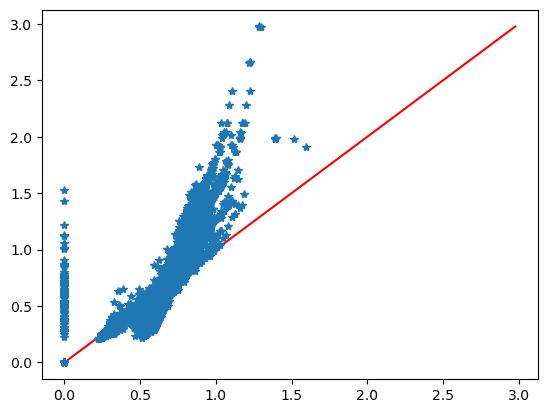

In [15]:
# check training performance
pred = rfr.predict(train_x)

pos_y = train_y.copy()
pos_p = pred.copy()

pos_y[pos_y < 0] = 0
pos_p[pos_p < 0] = 0

max_y = max(max(pos_y), max(pos_p))
plt.plot([0, max_y], [0, max_y], color='red')
plt.plot(pos_p, pos_y, "*")

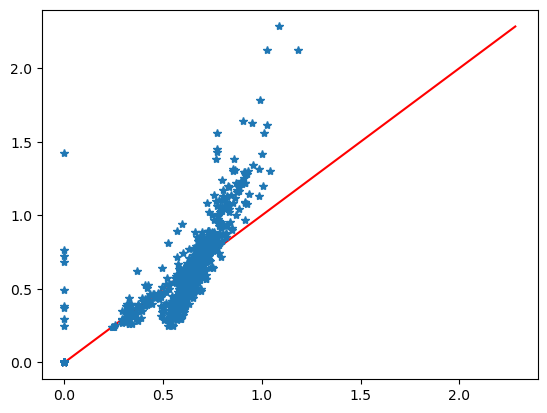

In [16]:
# check prediction performance
pred = rfr.predict(test_x)

pos_y = test_y.copy()
pos_p = pred.copy()

pos_y[pos_y < 0] = 0
pos_p[pos_p < 0] = 0

max_y = max(max(pos_y), max(pos_p))
plt.plot([0, max_y], [0, max_y], color='red')
plt.plot(pos_p, pos_y, "*")